<a href="https://colab.research.google.com/github/anjelica0224/MLPR/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
train_dataset = pd.read_csv('tblTrain.csv')
test_dataset = pd.read_csv('tblTest.csv')

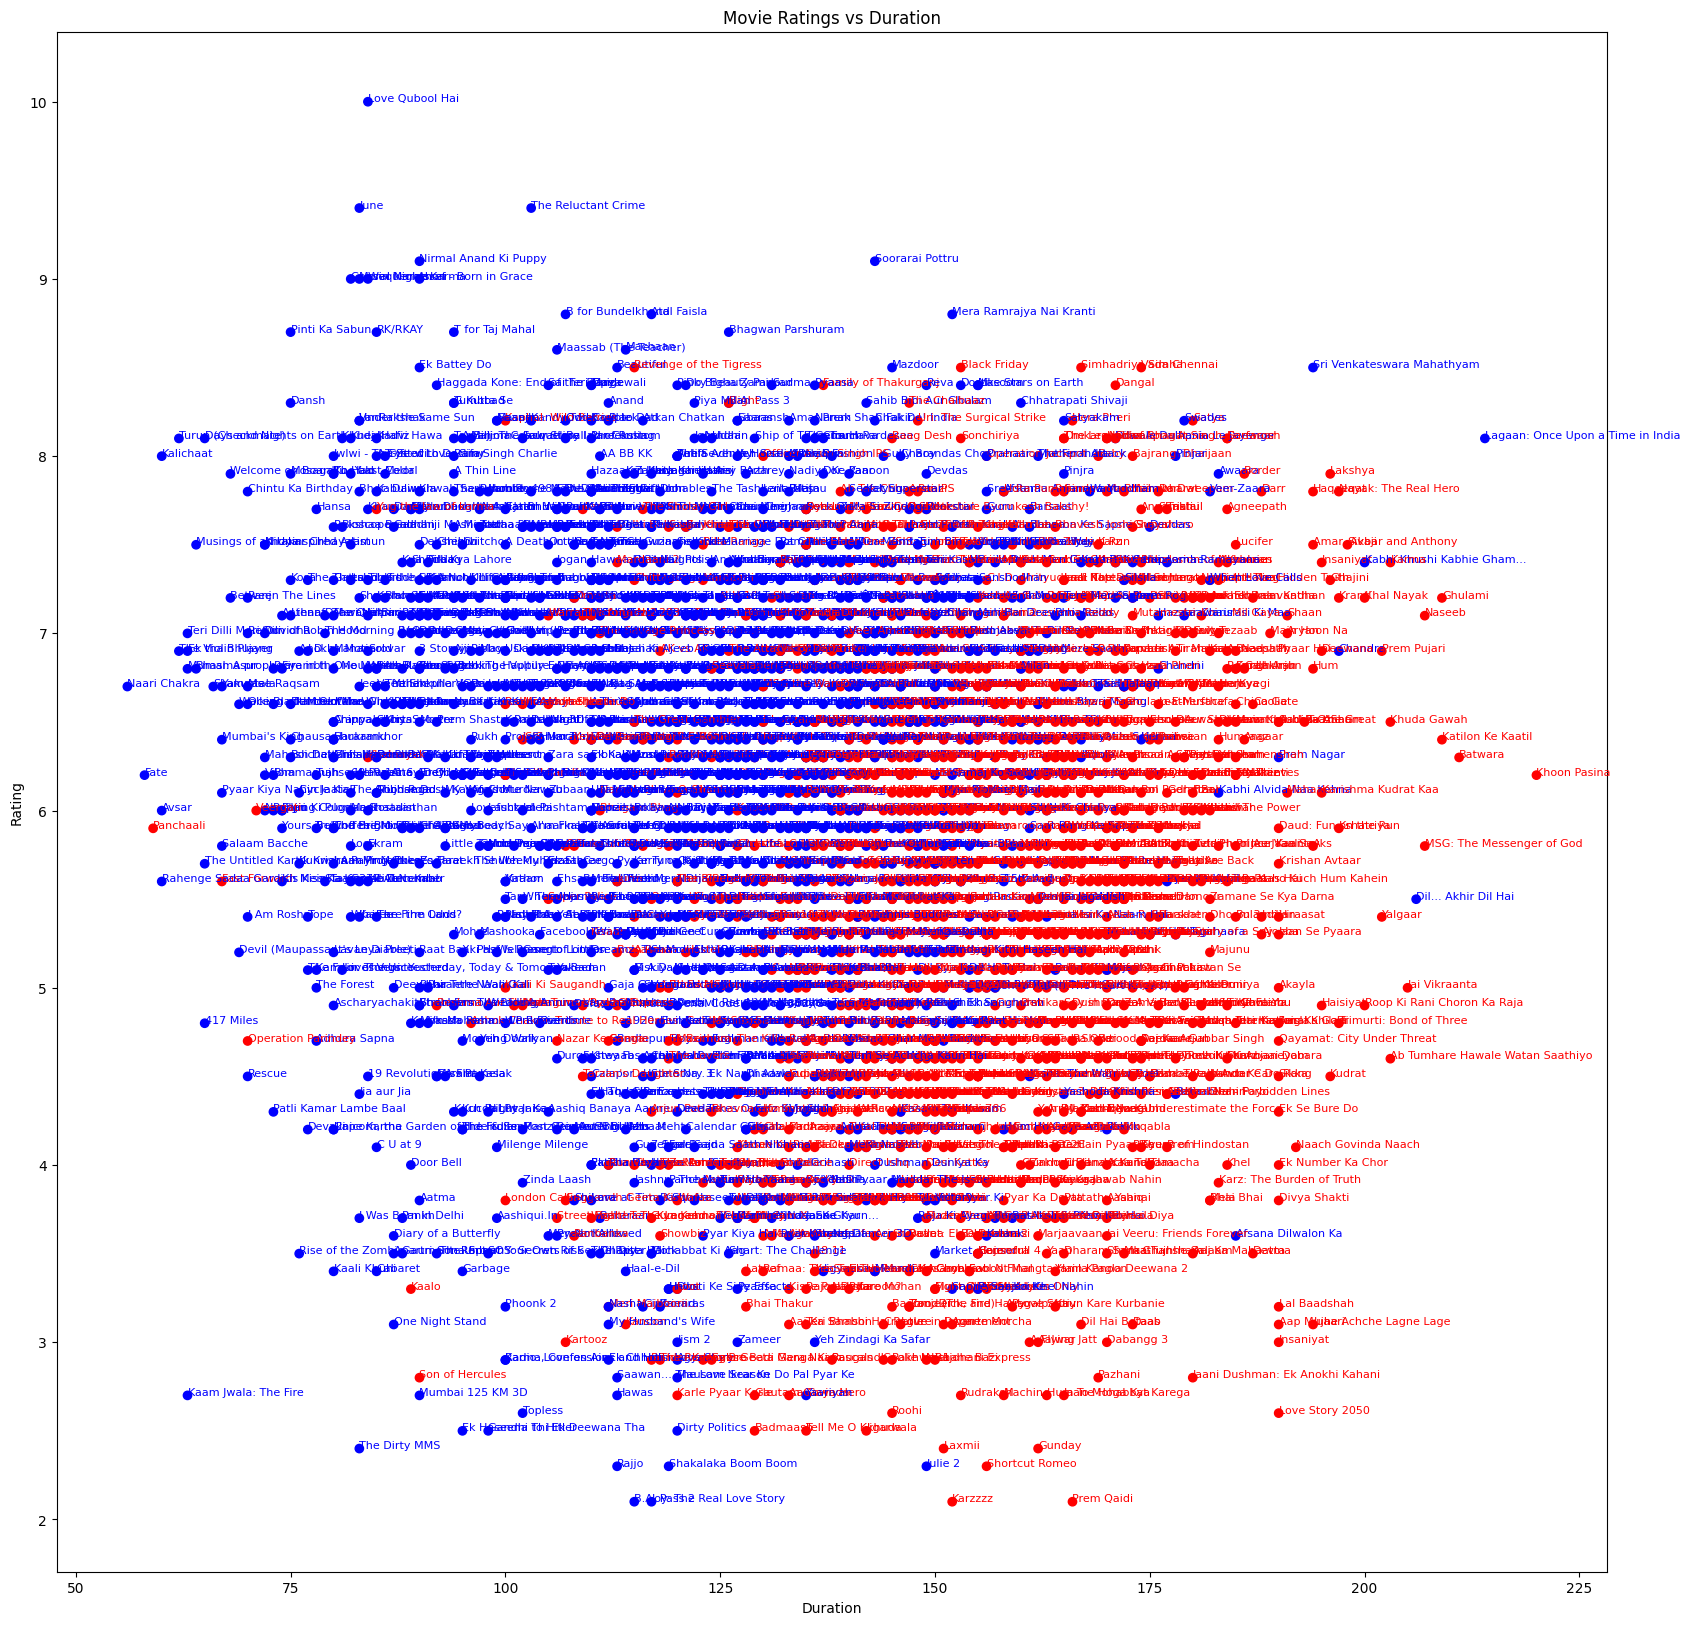

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))

# Assigning colors based on Genre
colors = train_dataset['Genre'].apply(lambda x: 'red' if x == 'Action' else 'blue')

# Scatter plot
plt.scatter(train_dataset['Duration'], train_dataset['Rating'], c=colors)

# Annotate each point with the movie name, using the same color as the genre
for i, row in train_dataset.iterrows():
    plt.text(row['Duration'], row['Rating'], row['Name'], fontsize=8, color=colors[i])

plt.xlabel('Duration')
plt.ylabel('Rating')
plt.title('Movie Ratings vs Duration')
plt.show()


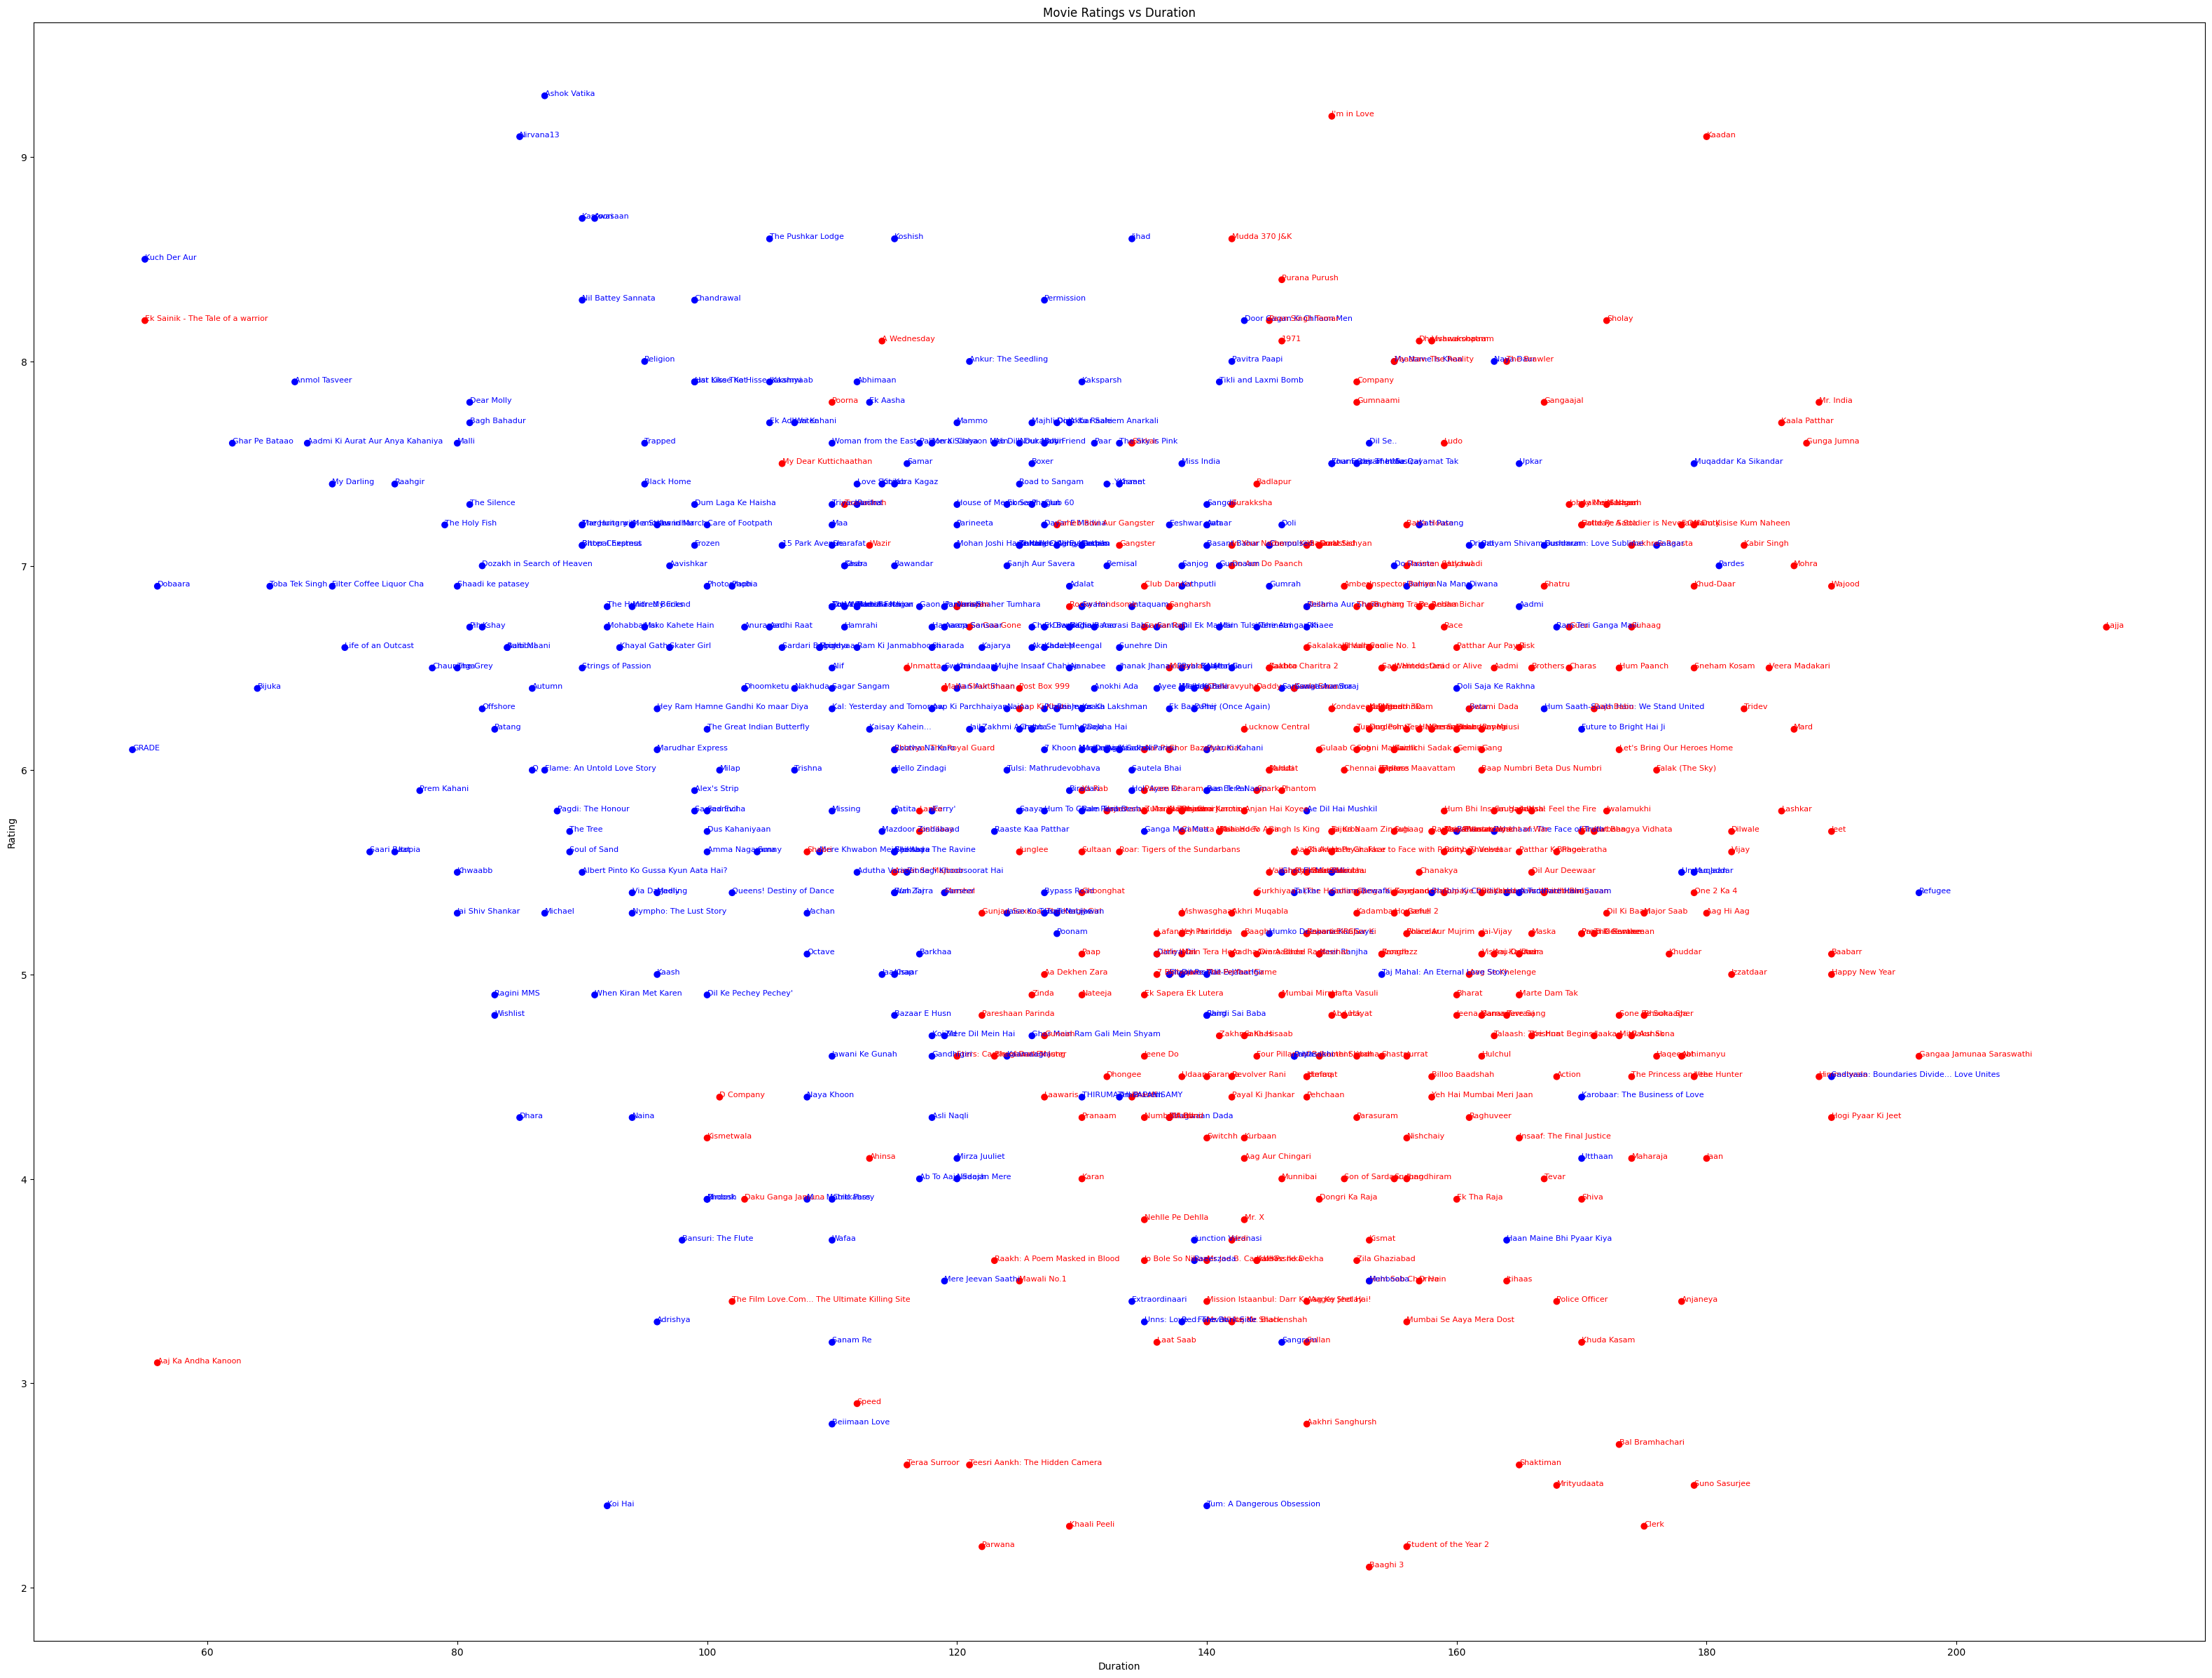

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(40,30))

# Assigning colors based on Genre
colors = test_dataset['Genre'].apply(lambda x: 'red' if x == 'Action' else 'blue')

# Scatter plot
plt.scatter(test_dataset['Duration'], test_dataset['Rating'], c=colors)

# Annotate each point with the movie name, using the same color as the genre
for i, row in test_dataset.iterrows():
    plt.text(row['Duration'], row['Rating'], row['Name'], fontsize=8, color=colors[i])

plt.xlabel('Duration')
plt.ylabel('Rating')
plt.title('Movie Ratings vs Duration')
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score

In [ ]:

X_train = train_dataset[['Duration', 'Rating']]
y_train = train_dataset['Genre'].apply(lambda x: 1 if x == 'Action' else 0)

X_test = test_dataset[['Duration', 'Rating']]
y_test = test_dataset['Genre'].apply(lambda x: 1 if x == 'Action' else 0)


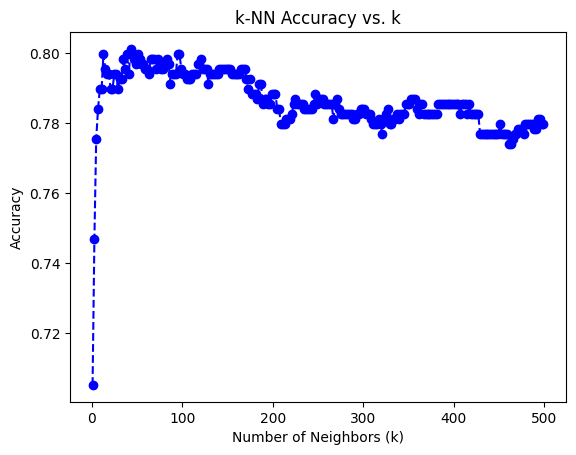

In [ ]:
knn_neighbors = list(range(1, 500, 2))
accuracies = []

for k in knn_neighbors:
    # 1.Apply k-NN algorithm on the training set
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)


    # 2.Use the test dataset to find predictions
    y_pred = knn.predict(X_test)

    # 3.Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # 4.Compute accuracy using the confusion matrix
    TN, FP, FN, TP = cm.ravel()
    accuracy = (TN + TP) / np.sum(cm)

    accuracies.append(accuracy)


plt.plot(knn_neighbors, accuracies, marker='o', linestyle='dashed', color='b')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k-NN Accuracy vs. k')
plt.show()


In [ ]:
max_acc = max(accuracies)
best_k = knn_neighbors[accuracies.index(max_acc)]
print(f"Optimal k: {best_k}, Maximum Accuracy: {max_acc:.4f}")

Optimal k: 43, Maximum Accuracy: 0.8011


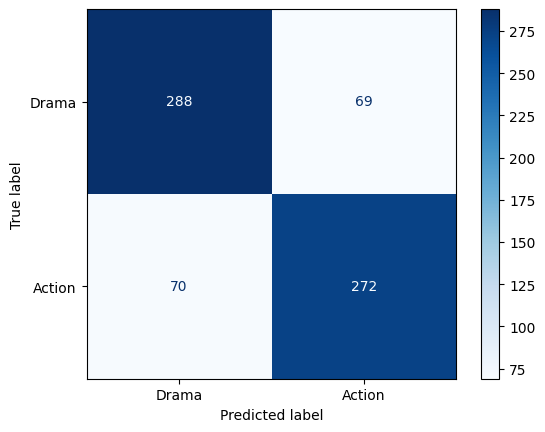

Precision: 0.7977
Recall: 0.7953
F1 Score: 0.7965


In [ ]:
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(X_train, y_train)
y_final_pred = knn_final.predict(X_test)

cm = confusion_matrix(y_test, y_final_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Drama', 'Action'])
disp.plot(cmap='Blues')
plt.show()

precision = precision_score(y_test, y_final_pred)
recall = recall_score(y_test, y_final_pred)
f1 = f1_score(y_test, y_final_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


# **REPORT**

##### **Q1. What does the 'k' value in KNN determine?**
The K-value defines how many neighbors will be checked to determine the classification of a specific query point.

##### **Q2. How is the optimal 'k' value in KNN typically chosen?**
The choice of k will largely depend on the input data as data with more outliers or noise will likely perform better with higher values of k. Overall, it is recommended to have an odd number for k to avoid ties in classification, and cross-validation tactics can help you choose the optimal k for your dataset.

##### **Q3. How does the value of 'k' affect variance and bias in KNN?**
Lower values of k can have high variance, but low bias. The training data will be perfectly predicted for k=1, the bias will be 0 when K=1, however, when it comes to new data (in test set), it has higher chance to be an error, which causes high variance.  When we increase K, the training error will increase (increase bias), but the test error may decrease at the same time (decrease variance). When K becomes larger, since it has to consider more neighbors, its model is more complex.

##### **Q4. Is KNN sensitive to outliers, and why?**
KNN works by selecting nearest neighbours based on distance hence sensitive to outliers.

##### **Q5. How does the scale of features affect the performance of KNN?**
All distance based algorithms are affected by the scale of the variables. If the data is not scaled, features with larger scales will dominate the distance calculation and can result in incorrect classifications.